# Statistical Inference

Many visualizations were made while exploring the dataset. These visualizations assisted in coming up with some questions that could be looked into in order to describe the trends or relationships between the different video game variables. In this notebook, the visualizations will be used to guide the way to some potential statisical inferences that may be concluded from this dataset.  

The original question for this capstone project was whether or not the Metacritic rating of various video games was somehow related to how well they sold. Video games could potentially have both a critic rating or a user rating. Lets first look at whether or not there is a statistically significant difference in the average scores given by critics or by users.

In [1]:
#importing modules and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The code below is setting some defaults for the plots. It is also importing the cleaned video game dataset.

In [2]:
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

df = pd.read_csv('data/Clean_Video_Game_Sales.csv', index_col=0)
df.head()

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0
3,Wii Sports Resort,Sports,2009,Nintendo,32.77,80.0,80.0
4,Call of Duty: Modern Warfare 3,Shooter,2011,Activision,30.59,88.0,34.0


## Critic Scores vs. User Scores 

Creating a function that plots a histogram of a variable with some default settings.

In [3]:
#defining a function to plot a histogram with some defaults
def hist(data1, bins=20, color='orange', alpha=1, density=None, label=None, edgecolor='black'):
    plt.hist(data1, bins=bins, color=color, alpha=alpha, density=density, label=label, edgecolor=edgecolor)

Ploting the histograms of the values of critic and user scores.

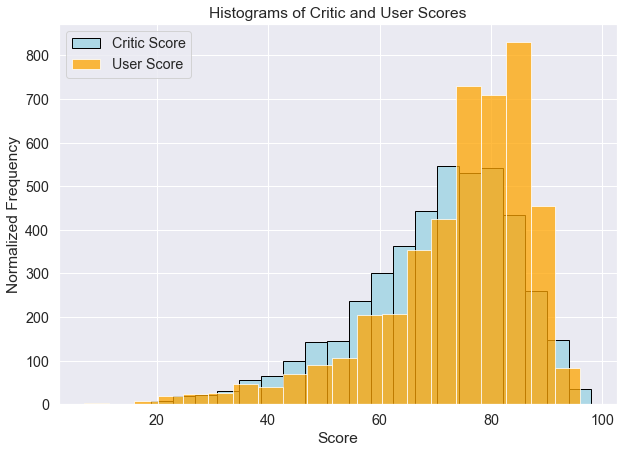

Critic Score mean: 70.45 
User Score mean: 74.34 
Difference of means -3.88


In [4]:
#visualizing distribution of scores

critic = df['Critic_Score']
user = df['User_Score']

hist(critic,color='lightblue', edgecolor='black')
hist(user, alpha=0.75, edgecolor='white')

plt.xlabel('Score')
plt.ylabel('Normalized Frequency')
plt.title('Histograms of Critic and User Scores')
plt.legend(('Critic Score', 'User Score'),loc='upper left')
plt.show()

critic_mean = np.mean(critic)
user_mean = np.mean(user)
obs_diff = critic_mean - user_mean
print("Critic Score mean: %.2f \nUser Score mean: %.2f \nDifference of means %.2f" 
      % (critic_mean, user_mean, obs_diff ) )

###### Observations:
Looking at the above plot, it can be seen that the distributions of the critic and user scores are close. But it looks like user scores may have a slightly higher average score. A hypothesis test can be performed to see how likely it would be to get this observed difference if the average scores were the same between critic and user scores.    

###### The following null and alternative hypotheses are:  
H<sub>0</sub>: The average scores between critics and users are the same.  
H<sub>a</sub>: There is a difference between the average scores of critics and users.  
The significance level, $\alpha$, will be 0.05.

Creating functions to perform bootstrap resampling and the difference of the means. Bootstrap resampling is performed by resampling with replacements from the original sample. The amount being resampled is equal to the size of the original sample. 

In [5]:
#defining a function to perform bootstrap resampling
def bootstrap(data):
    return np.random.choice(data, size=len(data), replace=True)

#accepts 2 data arrays and retu`rns samples of differences of means between them
def bs_diff_mean(data1, data2, size=10000):
    bs_reps = np.empty(size)
    
    for i in range(size):
        bs_data1 = bootstrap(data1)
        bs_data2 = bootstrap(data2)
        bs_reps[i] = np.mean(bs_data1) - np.mean(bs_data2)
        
    return bs_reps

Simulating a distribution where the difference of the means between the critic and user scores are the same. In order to have the same means, the datasets of critic and user scores are shifted by a mean value calculated by taking the the mean of the concatenated dataset of critic and user scores.

In [6]:
#simulating datasets with same means
np.random.seed(47)

shifted_mean = np.mean(np.concatenate((critic, user)))
shifted_critic = critic - critic_mean + shifted_mean
shifted_user = user - user_mean + shifted_mean

bs_diff = bs_diff_mean(shifted_critic, shifted_user)

Plotting the histogram of the simulated difference of means distribution as well the actual observed difference of means.

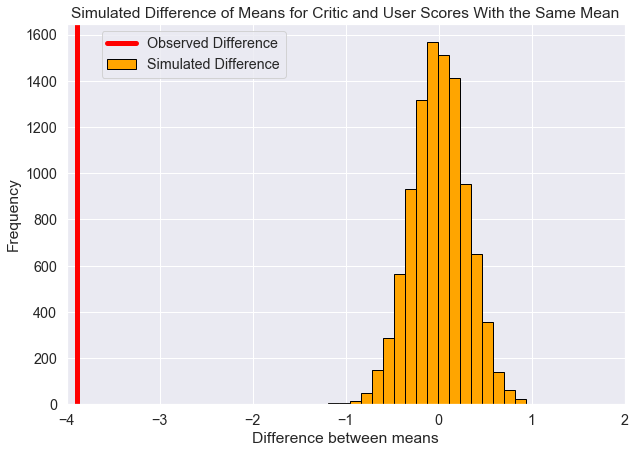

The p-value for the observed = 0.00E+00


In [7]:
hist(bs_diff)
plt.title("Simulated Difference of Means for Critic and User Scores With the Same Mean")
plt.xlabel("Difference between means")
plt.ylabel("Frequency")
plt.xlim(-4,2)
plt.axvline(obs_diff, color='red', lw=5)
plt.legend(("Observed Difference", 'Simulated Difference'),loc='upper left', bbox_to_anchor=(0.05,1))
plt.show()

p = sum(bs_diff <= obs_diff)/len(bs_diff)
print('The p-value for the observed = %.2E' % p)

###### Conclusions:  
Given that the p-value is zero and is below the $\alpha$ level of 0.05, the null hypothesis can be rejected. The plot also shows that the actual observed difference is way outside the range of possible differences if the means between critic and user scores were the same. So the alternative hypothesis that there is a difference between the average critic scores and the average user scores can be accepted.

Many people would say that  video games that have a high score should also sell more. Lets see if there is a significant correlation between the Metacritic scores and the global sales of video games through a linear regression analysis. 

## Metacritic Scores vs. Global Sales

When a video game is scored highly it would be intuitive to think that the video game would be doing well in sales. Lets see if there is a significant correlation between the Metacritic scores and the global sales of video games through a linear regression analysis. 

Defining a function to plot a scatter plot of two variables with some default settings.

In [8]:
#function to make a scatter plot with the two datasets
def scatter(data1, data2, alpha=1, color='orange', markeredgecolor=None):
    plt.plot(data1, data2, linestyle="none", marker='.', 
             markersize=10, alpha=alpha, color=color, 
             markeredgecolor=markeredgecolor)
    

Plotting a scatter plot of critic scores and global sales.

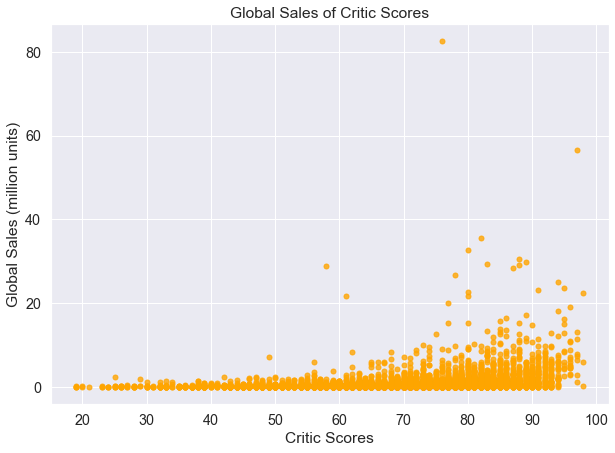

In [9]:
#visualizing the data
sales = df['Global_Sales']

scatter(critic, sales, alpha=.80)
plt.title('Global Sales of Critic Scores')
plt.ylabel('Global Sales (million units)')
plt.xlabel('Critic Scores')

plt.show()

###### Observations:
This visualization does not show much. A majority of the sales are low with a few data points being higher. Taking the logarithm of global sales should help visualize the data points better. Lets also try to fit a line to this plot and perform a hypothesis test to see if there is any correlation between critic scores and global sales. The null and alternative hypotheses are as follows:  

H<sub>0</sub>: There is no correlation between critic scores and global sales. The slope of the regession line is zero.  
H<sub>a</sub>: There is a correlation between critic scores and global sales. The slope of the regression line is not zero.  
The significance level, $\alpha$, will be 0.05.

In [10]:
#defining function for linear regression, fits a line and returns the r-squared and p-value
import scipy.stats as stats

def linereg(data1, data2):
    slope, intercept, r, p = stats.linregress(data1, data2)[:4]
    y = slope*data1 + intercept
    plt.plot(data1, y, lw=4)
    return r**2, p

Plotting the log of global sales against the critic score. Performing the linreg function on the two variables fits a line to the dataset and returns the r-squared value and the p-value.

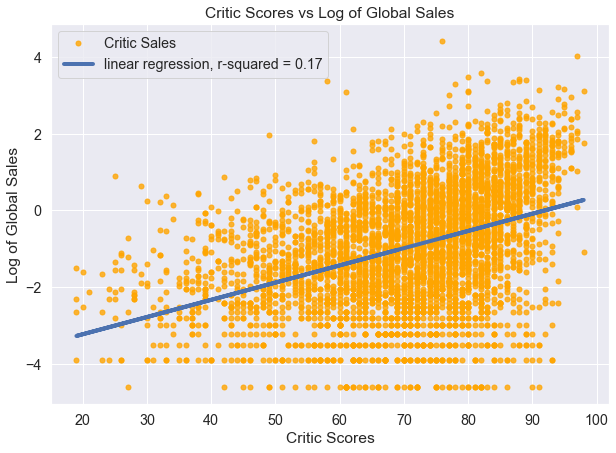

p-value = 1.26e-175


In [11]:
#plotting log of global sales
scatter(critic, np.log(sales), alpha=.8)
plt.title('Critic Scores vs Log of Global Sales')
plt.ylabel('Log of Global Sales')
plt.xlabel('Critic Scores')

#fitting line
r2_score_sales, p_score_sales = linereg(critic, np.log(sales))
plt.legend(('Critic Sales', 'linear regression, r-squared = {}'.format(round(r2_score_sales,2))))
plt.show()

print("p-value = %.2e" % p_score_sales)

###### Conclusions:
The p-value of 1.26e-175 is below our significance level of 0.05. This means that given there was no correlation between critic scores and the log of global sales, we would have a practically zero probability of getting our observed slope. We can reject our null hypothesis of having no correlation and accept our alternative hypothesis of there being a correlation between global sales and critic scores.

As we can see from the plot, the linear regression model doesn't seem to fit the data too well. The goodness of fit, R<sup>2</sup>, for the linear model is only a value of 0.15. The R<sup>2</sup> tells us that 17% of the log of global sale's variation can be explained by the linear regression model. A quick look at the R<sup>2</sup> for the user score vs. global sales shows that it is even lower, only 5%.

In [12]:
r2_user_sales = stats.linregress(user, np.log(sales))[2]**2
print("User Scores vs log Global Sales, r-squared = %.2f" % r2_user_sales)

User Scores vs log Global Sales, r-squared = 0.05


This data shows that there is a correlation betwen Metacritic scores and global sales, but that the linear regression model does not fit the actual datapoints too well. From our data exploration previously, we saw that other factors may affect the global sales more significantly.

## Count of Video Games vs. Global Sales

It was seen from the data exploration that the more video games a company makes, the more they sell. Lets see if linear regression can be used to fit the observed data.

The code below is adding a column to the dataset that shows the total count of video games made per publisher. This is done by first separating the publisher column into its own dataframe and then performing the value counts method on it. The original dataframe is then merged with the value counts dataframe on publisher.

In [13]:
#adding count of games per publisher column to the dataset
game_count = df['Publisher'].value_counts().reset_index()
game_count.columns = ['Publisher', 'count']
df_count = df.merge(game_count, 
                    on='Publisher').sort_values('Global_Sales', 
                                                ascending=False).reset_index().drop('index', axis=1)
df_count.head(3)

,Name,Genre,Year_of_Release,Publisher,Global_Sales,Critic_Score,User_Score,count
0,Wii Sports,Sports,2006,Nintendo,82.53,76.0,80.0,290
1,Grand Theft Auto V,Action,2013,Take-Two Interactive,56.57,97.0,83.0,129
2,Mario Kart Wii,Racing,2008,Nintendo,35.52,82.0,83.0,290


Grouping the dataset by publisher and count and aggregating on the sum of global sales.

In [14]:
#grouping by publisher and count of games, aggregating on sum of global sales
df_count_sales = df_count[['Global_Sales', 
                           'count', 
                           'Publisher']].groupby(['Publisher', 'count']).sum().reset_index()
count = df_count_sales['count']
count_sales = df_count_sales['Global_Sales']

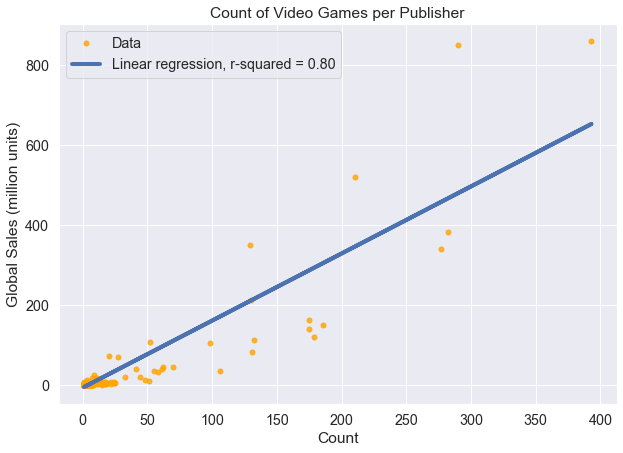

In [15]:
#plotting the publisher game counts vs global sales
scatter(count, count_sales, alpha=.8)
plt.xlabel('Count')
plt.ylabel('Global Sales (million units)')
plt.title('Count of Video Games per Publisher')
plt.xticks((np.linspace(0,400,9)))

#fitting line
r_count_sales, p_count_sales = linereg(count, count_sales)
plt.legend(('Data', 'Linear regression, r-squared = %.2f' % r_count_sales))
plt.show()

###### Observations:

There looks to be an obvious positive trend in the amount of video games sold and global sales. However, a large amount of the datapoints are all grouped up towards the bottom left of the plot. Taking the log of both global sales and count of video games will help visualize the data points better as well as the linear regression. The null and alternative hypothesis are as follows:  

H<sub>0</sub>: There is no correlation between log of count and log of sales. The slope of the regession line is zero.  
H<sub>a</sub>: There is a correlation between log of count and log of sales. The slope of the regression line is not zero.  
The significance level, $\alpha$, will be 0.05.

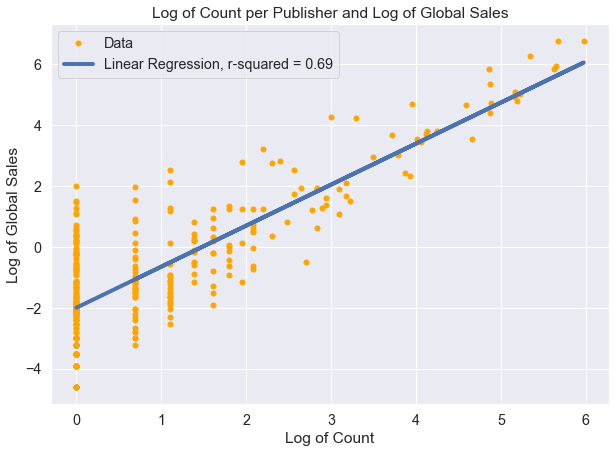

p-value = 1.59e-80


In [16]:
#taking log of the variables
log_count = np.log(count)
log_sales = np.log(count_sales)

#plotting scatter of the variables
scatter(log_count, log_sales)
plt.xlabel('Log of Count')
plt.ylabel('Log of Global Sales')
plt.title('Log of Count per Publisher and Log of Global Sales')

#fitting line
r_logcount_logsales, p_logcount_logsales = linereg(log_count, log_sales)
plt.legend(('Data', 'Linear Regression, r-squared = %.2f' % r_logcount_logsales))
plt.show()

print("p-value = %.2e" % p_logcount_logsales)

###### Conclusions:
The p-value tells us the probability of getting the observed value of the slope for the linear regression if the true slope was zero. The p-value, 1.59e-80, is below our significance level of 0.05, therefore we can reject the null hypothesis that there is no correlation between our variables. We accept the alternative hypothesis that there is a statistically significant correlation between the log of video game counts per publisher and the log of global sales.  

The R<sup>2</sup> indicates that the linear regression model explains about 69% of the log of global sale's variation.

## Genre vs. Global Sales

Another factor that was seen to affect the global sales was the genre of the video games. From the plot below, it is seen that action games sold more than any other genre by about 400 million units over the next two highest selling genre. Lets see the plot as well as the proportion of video games that are action.

The code below is grouping the dataset by genre and aggregating on the sum of global sales.

In [17]:
#Grouping by Genre with sum of total Global Sales
df_genre = df[['Genre', 'Global_Sales']].groupby('Genre').sum().reset_index()
df_genre.sort_values('Global_Sales', inplace=True)

Plotting a bar graph of the video game genre and their global sales. The proportion of action games is also calculated by taking the size of the dataset filtered by action games and dividing it by the total size of the dataset.

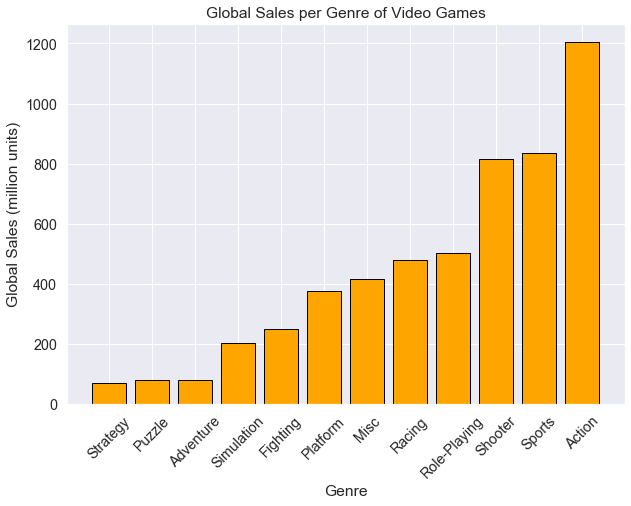

Proportion of Action Games = 0.198


In [18]:
plt.bar(df_genre['Genre'], df_genre['Global_Sales'], color='orange', edgecolor='black')

plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Global Sales (million units)')
plt.title('Global Sales per Genre of Video Games')
plt.show()

df_action = df[df['Genre'] == 'Action'].Genre
obs_action_prop = np.size(df_action)/np.size(df.Genre)
print('Proportion of Action Games = %.3f' % obs_action_prop)

###### Observations:  
About 20% of all video games in this dataset are action. How confident are we in this representing the actual proportion of the population? Lets run bootstrap resampling and compute the 95% confidence interval. A hypothesis test will also be performed with the following null and alternative hypotheses:  

H<sub>0</sub>: The proportion of all the genres are equal, action games have a proportion of 1/12, or 8%  
H<sub>a</sub>: There is a difference in the proportions of video game genre, action game proportion does not equal 1/12, or 8%.  
The significance level, $\alpha$, will be 0.05.

Bootstrap resampling is performed on the dataset's genre column. After each resampling, the proportion of action games is taken and stored in an array. This is repeated 10,000 times in order to acquire a distribution of proportions.

In [19]:
#performing bootstrap resampling
np.random.seed(47)
bs_action_prop = np.empty(10000)

for i in range(10000):
    bs_data = bootstrap(df.Genre)
    bs_prop = np.sum(bs_data == 'Action')/len(bs_data)
    bs_action_prop[i] = bs_prop


For bootstrap resampling, the 95% confidence interval can be found by taking the 2.5th and 97.5th percentile of the bootstrap proportion distribution.

In [20]:
#calculating 95% confidence interval
lower_ci_action, upper_ci_action = np.percentile(bs_action_prop, [2.5, 97.5])

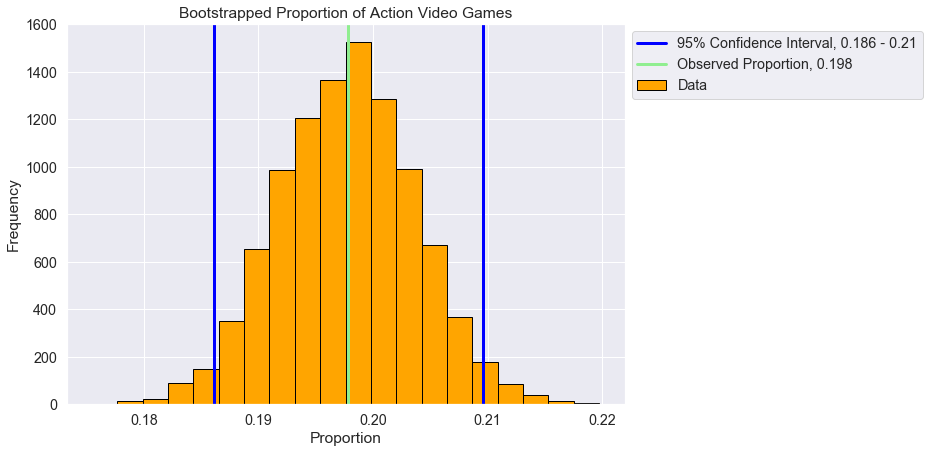

In [21]:
hist(bs_action_prop, label='Data')

plt.title('Bootstrapped Proportion of Action Video Games')
plt.xlabel('Proportion')
plt.ylabel('Frequency')
plt.axvline(lower_ci_action, lw=3, color='blue', 
            label='95% Confidence Interval, {} - {}'.format(round(lower_ci_action,3), round(upper_ci_action,3)))
plt.axvline(upper_ci_action, lw=3, color='blue')
plt.axvline(obs_action_prop, lw=3, color='lightgreen', label='Observed Proportion, %.3f' % obs_action_prop)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

The 95% confidence interval here says that there is a 95% chance of the true proportion of action video games is between 18.6% and 21%.

The code below creates a simulated dataset with the same size as our original dataset. This simulated dataset will have all genre with equal proportions. This is done by taking the length of the dataset and dividing it into 12 equal parts to fill with each genre.

In [22]:
#simulating a dataset with equal proportions of genre
prop = len(df.Genre)//12
df_sim = []
for genre in df.Genre.unique():
    rep = np.array([genre] * prop)
    df_sim = np.append(df_sim,rep)

#prints the count of occurences for each genre.
np.unique(df_sim, return_counts=True)

(array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
        'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
        'Strategy'], dtype='<U32'),
 array([369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369, 369],
       dtype=int64))

Performing a bootstrap resampling of the equally simulated dataset and calculating the proportion of action games for each resample.

In [23]:
np.random.seed(47)
bs_action_sim = np.empty(10000)
for i in range(10000):
    bs_sim = bootstrap(df_sim)
    bs_action_sim[i] = np.sum(bs_sim == 'Action')/len(bs_sim)

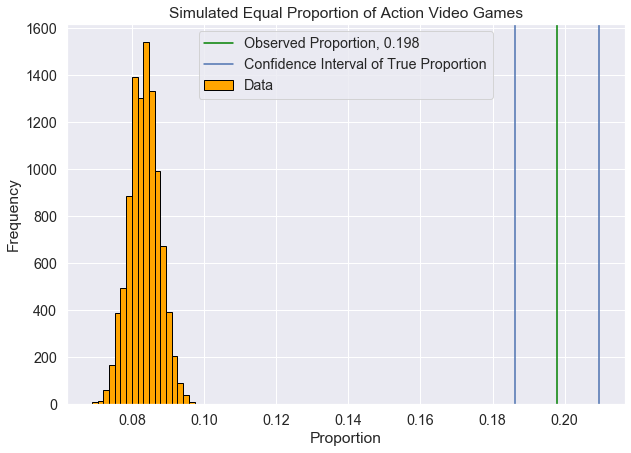

The p-value for the observed = 0.00


In [24]:
hist(bs_action_sim, label="Data")

plt.title("Simulated Equal Proportion of Action Video Games")
plt.ylabel("Frequency")
plt.xlabel("Proportion")
plt.axvline(obs_action_prop, c='green', label='Observed Proportion, %.3f' % obs_action_prop)
plt.axvline(lower_ci_action, label='Confidence Interval of True Proportion')
plt.axvline(upper_ci_action)
plt.legend(loc='upper center')
plt.show()

p = sum(bs_action_sim >= obs_action_prop)/len(bs_action_sim)
print('The p-value for the observed = %.2f' % p)

###### Conclusions:
There is 95% confidence that the true proportion of action video games is between 0.186 and 0.213. This may explain why the overall global sales for action games is so high. There are about 20% of all the video games in one genre, with their global sales added up. The probability that we would have seen our observed proportion if the proportion of all the genres of video games were equal is 0, our p-value. Since the p-value is lower than our significance level, we can reject the null hypothesis that the proportions of genres are equal. The uneven proportion of genre causes skewed overall global sales. Finally, Lets take a look at the average sales per genre instead.

##  Genre vs Global Sales continued...

Previously, we saw that when all of the global sales were added up per genre, action games were on top. This was because action games made up about 20% of all the video games. Looking at the average global sales, instead, should give a better idea of how well we can expect each genre to sell.

Lets first remove the outliers of "Wii Sports" and "Grand Theft Auto V", as they will skew the average global sales for some of the genres.

In [25]:
#observing dataset for the outliers
df[['Name', 'Global_Sales']].head(3)

,Name,Global_Sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Mario Kart Wii,35.52


In [26]:
#dropping the records and then observing dataset again
df_no_outlier = df.drop([0,1])
df_no_outlier[['Name', 'Global_Sales']].head(3)

,Name,Global_Sales
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Call of Duty: Modern Warfare 3,30.59


The dataset will now be grouped up by each genre with their average global sales.

In [27]:
#creating grouped dataset for means of global sales per genre
df_genre_means = df_no_outlier[['Genre', 'Global_Sales']].groupby('Genre').mean().reset_index()
df_genre_means.sort_values('Global_Sales', inplace=True)

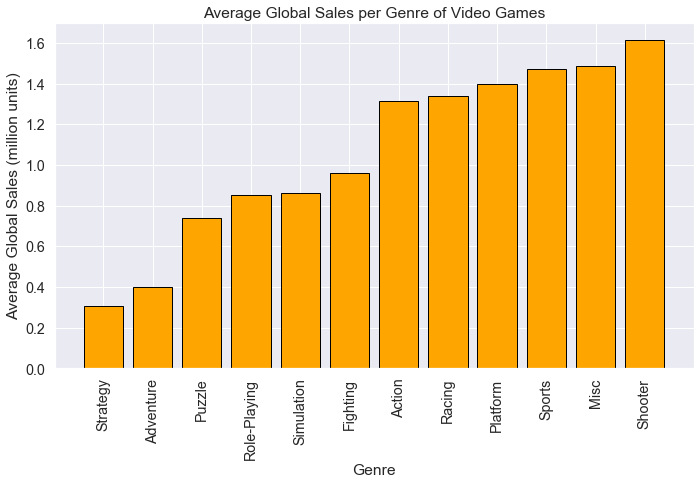

In [28]:
#average global sales per genre
plt.bar(df_genre_means['Genre'], df_genre_means['Global_Sales'], color='orange', edgecolor='black')

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (million units)')
plt.title('Average Global Sales per Genre of Video Games')

plt.tight_layout()
plt.show()

###### Observations:
It looks like the top 2 video game genres have very similar average global sales, with shooters having a slightly higher value. Lets take a look at the top 2 genres, shooters and sports, and see what the difference of their standard deviations are. A hypothesis test can also be performed for this difference to see if this difference was due to chance. The null and alternative hpotheses are as follows:  

H<sub>0</sub>: There is no difference between the standard deviations of shooter and sports global sales (shooter_std - sports_std = 0).  
H<sub>a</sub>: There is a differen between the standard deviations of shooter and sports global sales.  
The significance level, $\alpha$, will be 0.05.

The dataset will be filtered by the shooter and sports genre. The standard deviation of global sales for each genre will be calculated.

In [29]:
shooter = df_no_outlier[df_no_outlier.Genre == 'Shooter'].Global_Sales
sports = df_no_outlier[df_no_outlier.Genre == 'Sports'].Global_Sales
shooter_std = np.std(shooter) 
sports_std = np.std(sports) 
obs_diff_std = shooter_std - sports_std

print("Shooter STD: %.2f, Sports STD: %.2f, Observed Difference: %.2f" % (shooter_std, sports_std, obs_diff_std))

Shooter STD: 3.52, Sports STD: 2.70, Observed Difference: 0.82


A simulated dataset of standard deviation differences will be formed through permuation testing. This dataset will simulate the standard deviations of shooters and sports being equal. This will be done by concatenating the datasets for shooter and sports into one and then randomly permuting through it into a new dataset. This new dataset will then be split into the original ratios of shooter and sports video games. The standard deviations of each genre will be calculated and then subtracted from each other. This process will be repeated 10,000 times in order to create a simulated distribution of standard deviation differences.

In [30]:
np.random.seed(47)
sim_diff = np.empty(10000)
for i in range(10000):
    data = np.random.permutation(np.concatenate((shooter, sports)))
    perm_shooter = data[:np.size(shooter)]
    perm_sports = data[np.size(shooter):]
    sim_diff[i] = np.std(perm_shooter) - np.std(perm_sports)

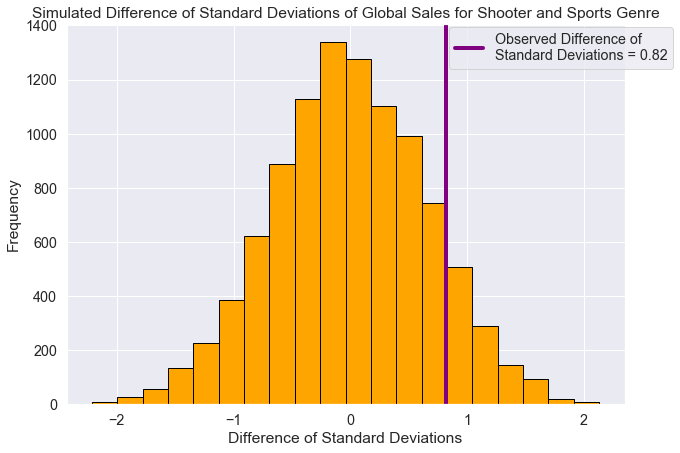

The p-value is 0.11


In [31]:
hist(sim_diff)

plt.title("Simulated Difference of Standard Deviations of Global Sales for Shooter and Sports Genre")
plt.xlabel("Difference of Standard Deviations")
plt.ylabel("Frequency")
plt.axvline(obs_diff_std, label='Observed Difference of \nStandard Deviations = %.2f' % obs_diff_std, lw=4, color='purple')
plt.legend(loc='upper right', bbox_to_anchor=(1.10,1.01))

plt.show()

p = np.sum(sim_diff >= obs_diff_std)/len(sim_diff)
print("The p-value is %.2f" % p)

###### Conclusions:
The p-value of 0.11 is larger than the significance level of 0.05. This means that the null hypothesis of the standard deviations of global sales for shooters and sports video games being the same can be accepted. There is no statistically significant difference between the variance of the two video game genres. 

## Summary

Statistical inference was performed on this dataset of video games through hypothesis testing, confidence interval calculating, and model fitting. What was found was that there is a statistically significant difference between the scores given by critics and users. It was also shown that there is a correlation, a low one, between Metacritic scores and global sales of a video game. Finding this out lead to looking at other variables with the hopes of find something that explained global sales better.   

Performing a linear regression analysis on the log of global sales and the log of video game counts per publisher provided an R<sup>2</sup> of 78%. There is a significant correlation between global sales and count of video games per publisher.  

Plotting a bar chart of all the different video game genres with their total global sales revealed that action video games performed significantly better than all the other genres. A more in-depth look into this analysis showed that the reason why action video games had such a high value for total global sales was because the action games made up for about 20% of all the video games in the dataset. From this information, it was inferred that looking at the average global sales of all the video game genres would provide a better representation of their relationship.  

Performing the analysis showed that the top selling genres had very similar values. In order to show that dataset of the top 2 video game genres, shooter and sports, were not affected by different outliers in the dataset, a permutation test was performed. The results of this permuation test concluded that the difference in the standard deviations of global sales for the two genres was statistically insignificant.